## Importing relevent Depenedencies

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###Data Analysis and Visualization

<Axes: xlabel='quality', ylabel='count'>

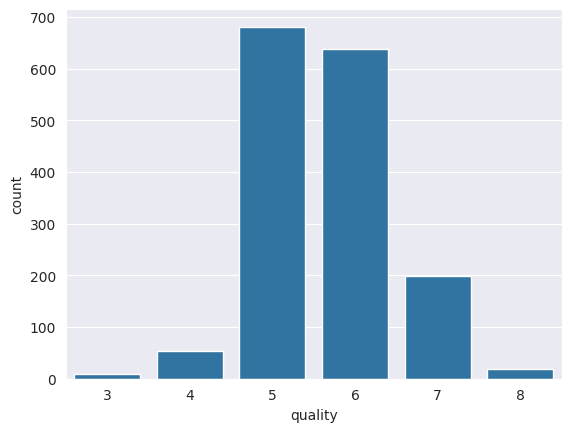

In [29]:
sns.countplot(x='quality', data=df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

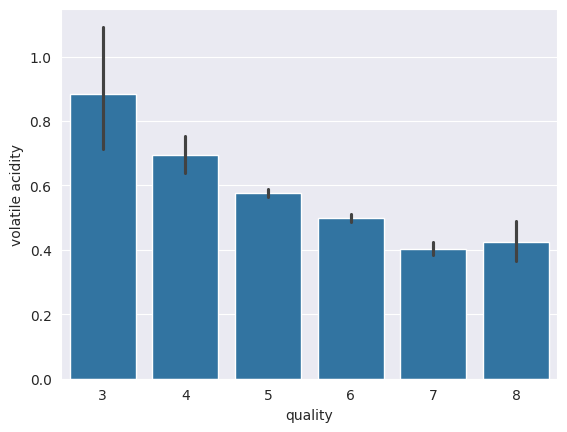

In [56]:
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

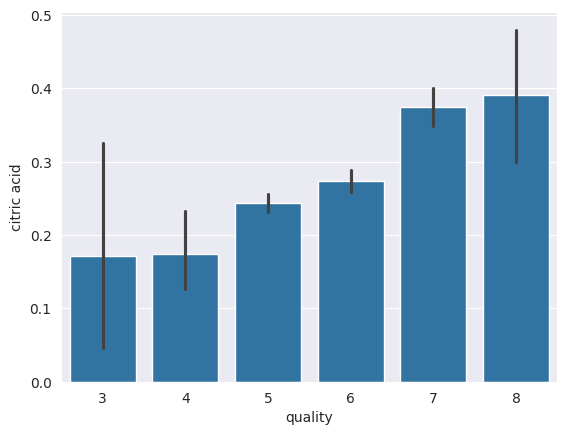

In [44]:
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

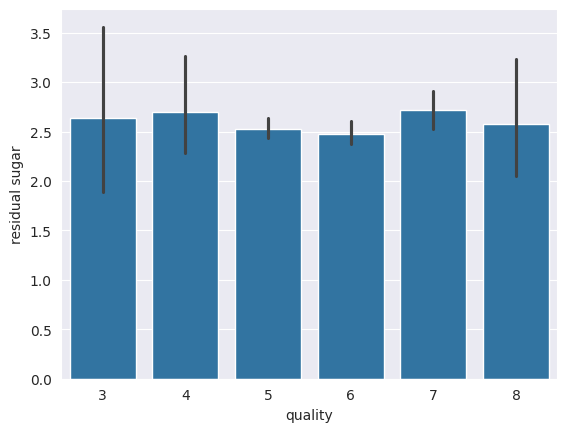

In [57]:
sns.barplot(x='quality',y='residual sugar',data=df)

<Axes: >

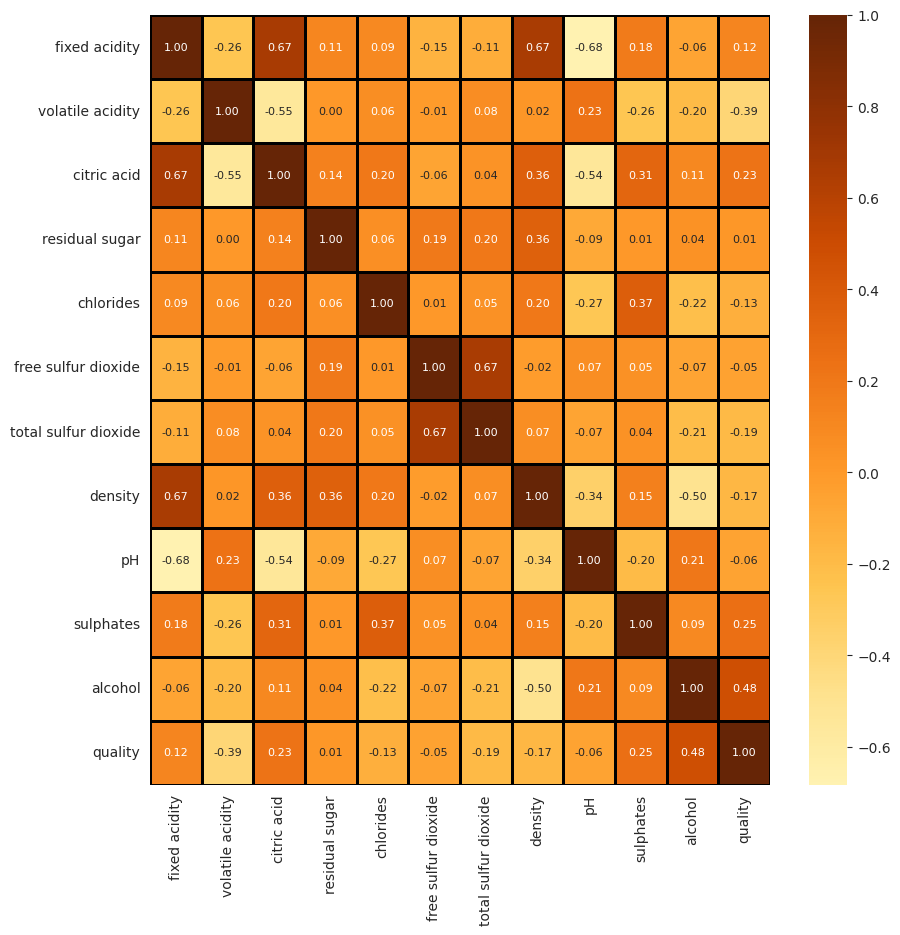

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='YlOrBr',center=0,linewidth=2,linecolor='black',annot= True,annot_kws={'fontsize':8}, fmt='.2f')

## Preprocessing

In [73]:
X=df.drop(['quality'],axis=1)
Y=df['quality'].apply(lambda x:1 if x>=7 else 0) #label binarizaton
print(X)
print('-'*50)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

###Training & Testing Data

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=22)

In [75]:
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [76]:
train_pred=classifier.predict(X_train)
train_acc=accuracy_score(train_pred,Y_train)
print(f'Train accuracy:{train_acc*100:.2f}%')

Train accuracy:100.00%


In [77]:
test_pred=classifier.predict(X_test)
test_acc=accuracy_score(test_pred,Y_test)
print(f'Test accuracy:{test_acc*100:.2f}%')

Test accuracy:92.81%


In [93]:
X_new=(7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
nparray=np.asarray(X_new)
reshaped_data=nparray.reshape(1,-1)
prediction=classifier.predict(reshaped_data)
(prediction)
if (prediction[0]=='1'):
  print ('-'*25+'\nThe Wine is Good Quality\n'+'-'*25)
else:
  print('-'*25+'\nThe Wine is Bad Quality\n'+'-'*25)


-------------------------
The Wine is Bad Quality
-------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
